Saved Fig2a_Metalcone_Thickness as ('png', 'pdf')
Saved Fig2b_Metalcone_GPC as ('png', 'pdf')


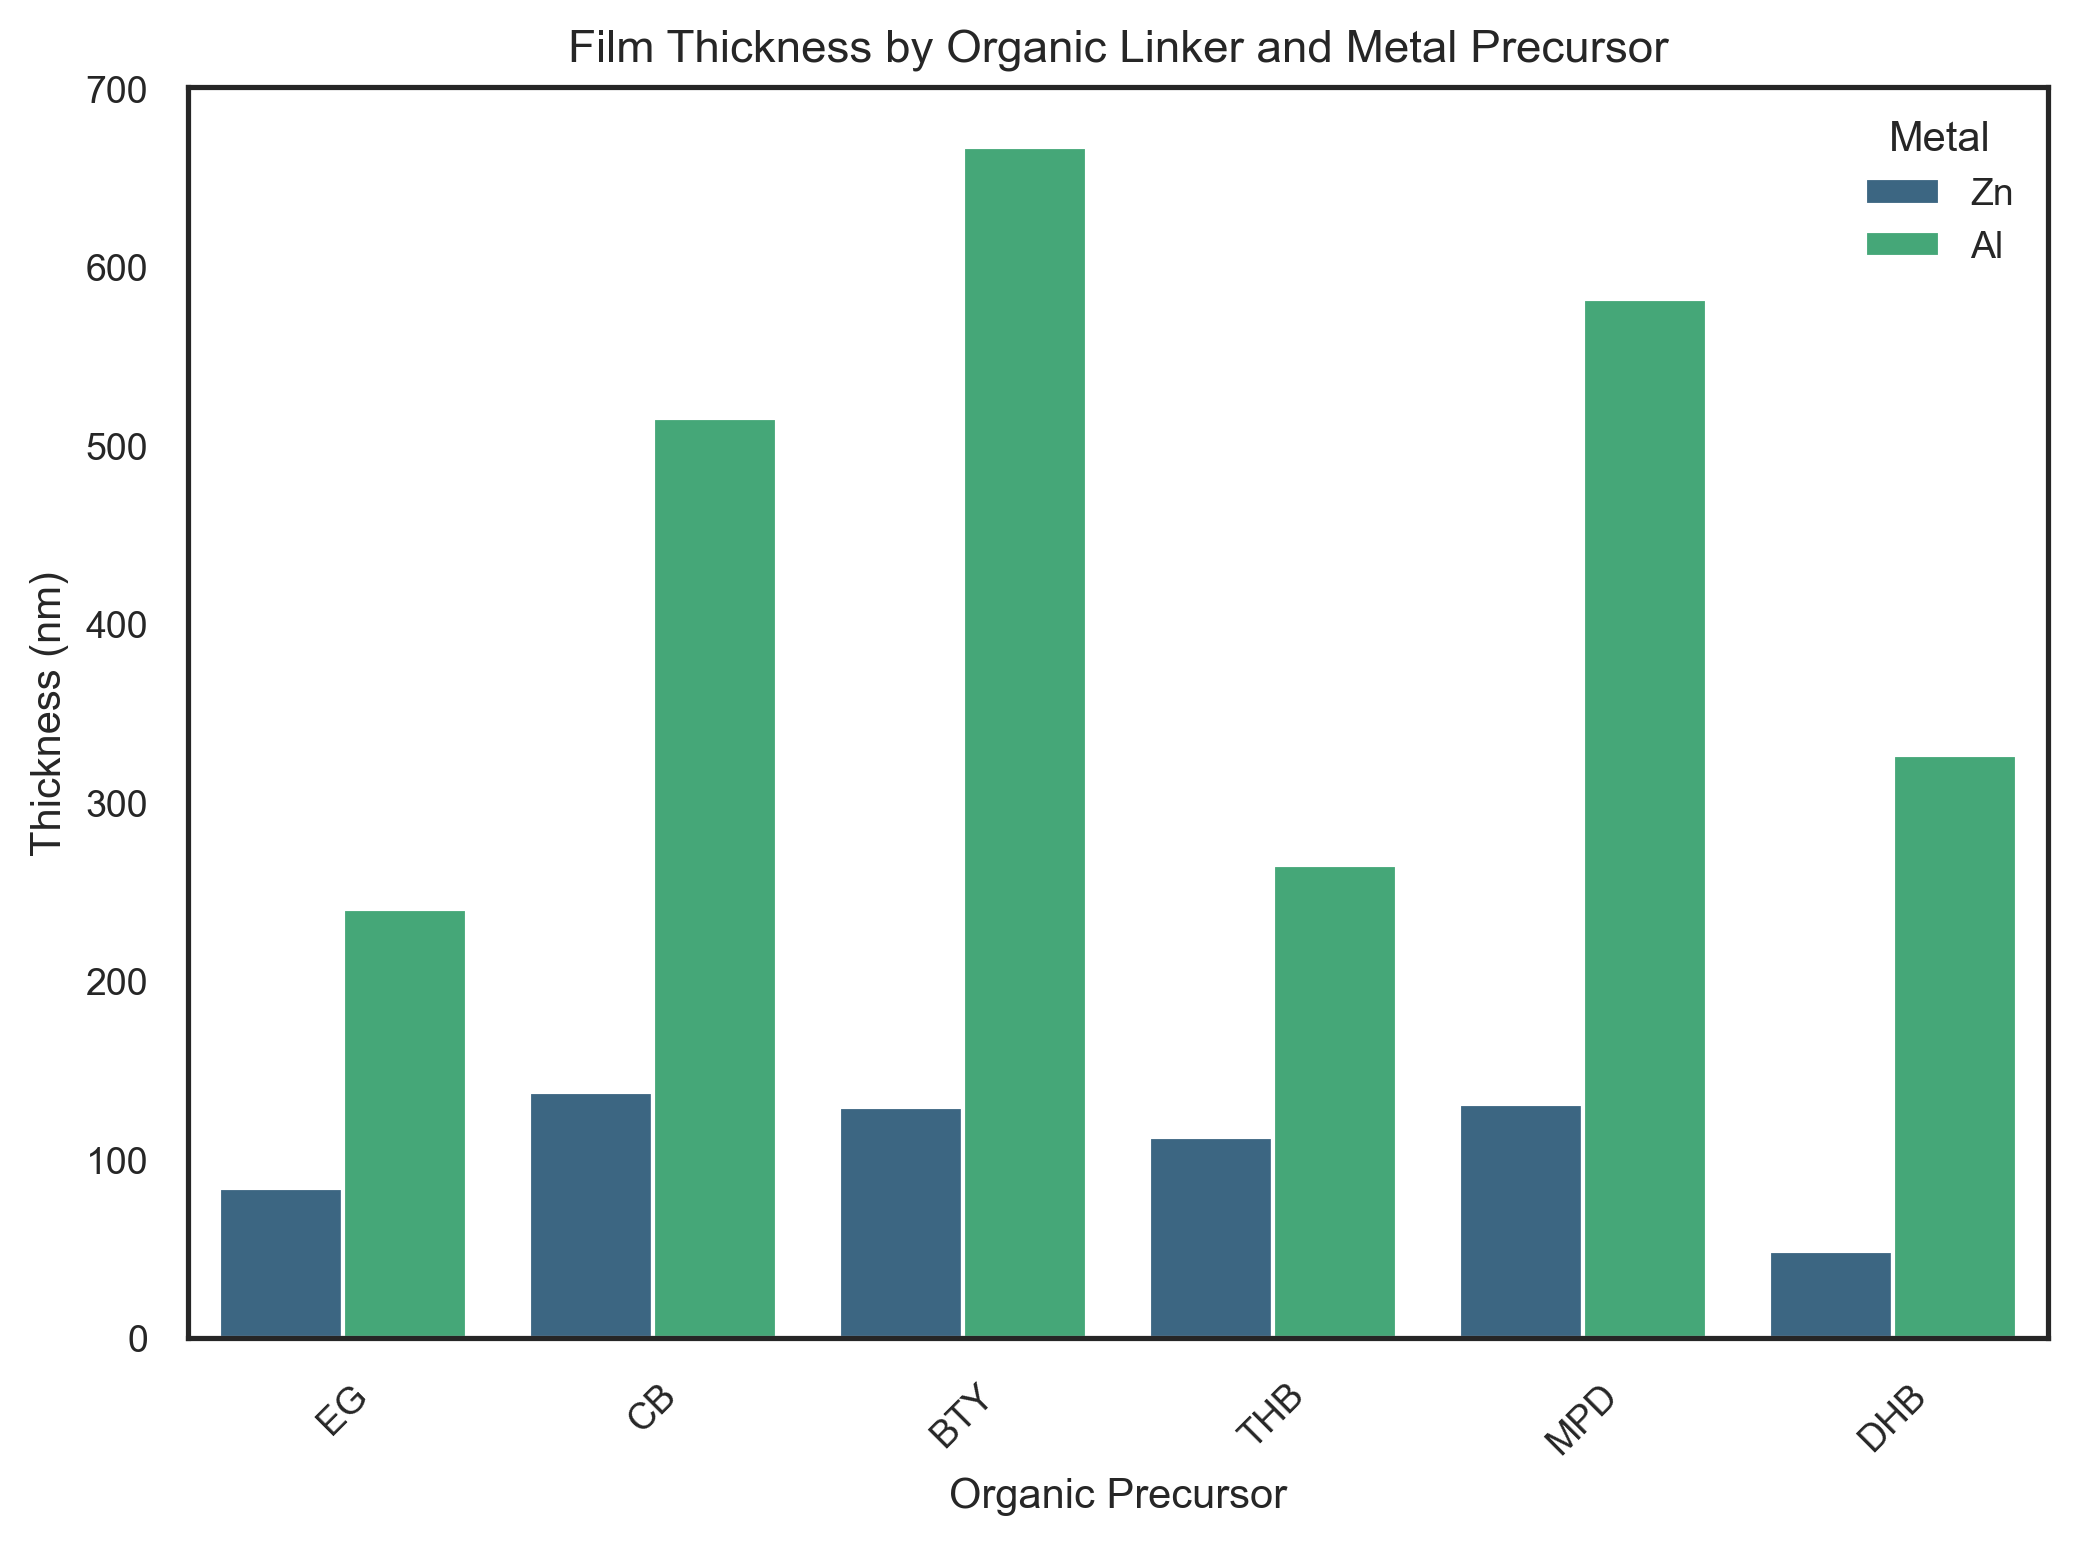

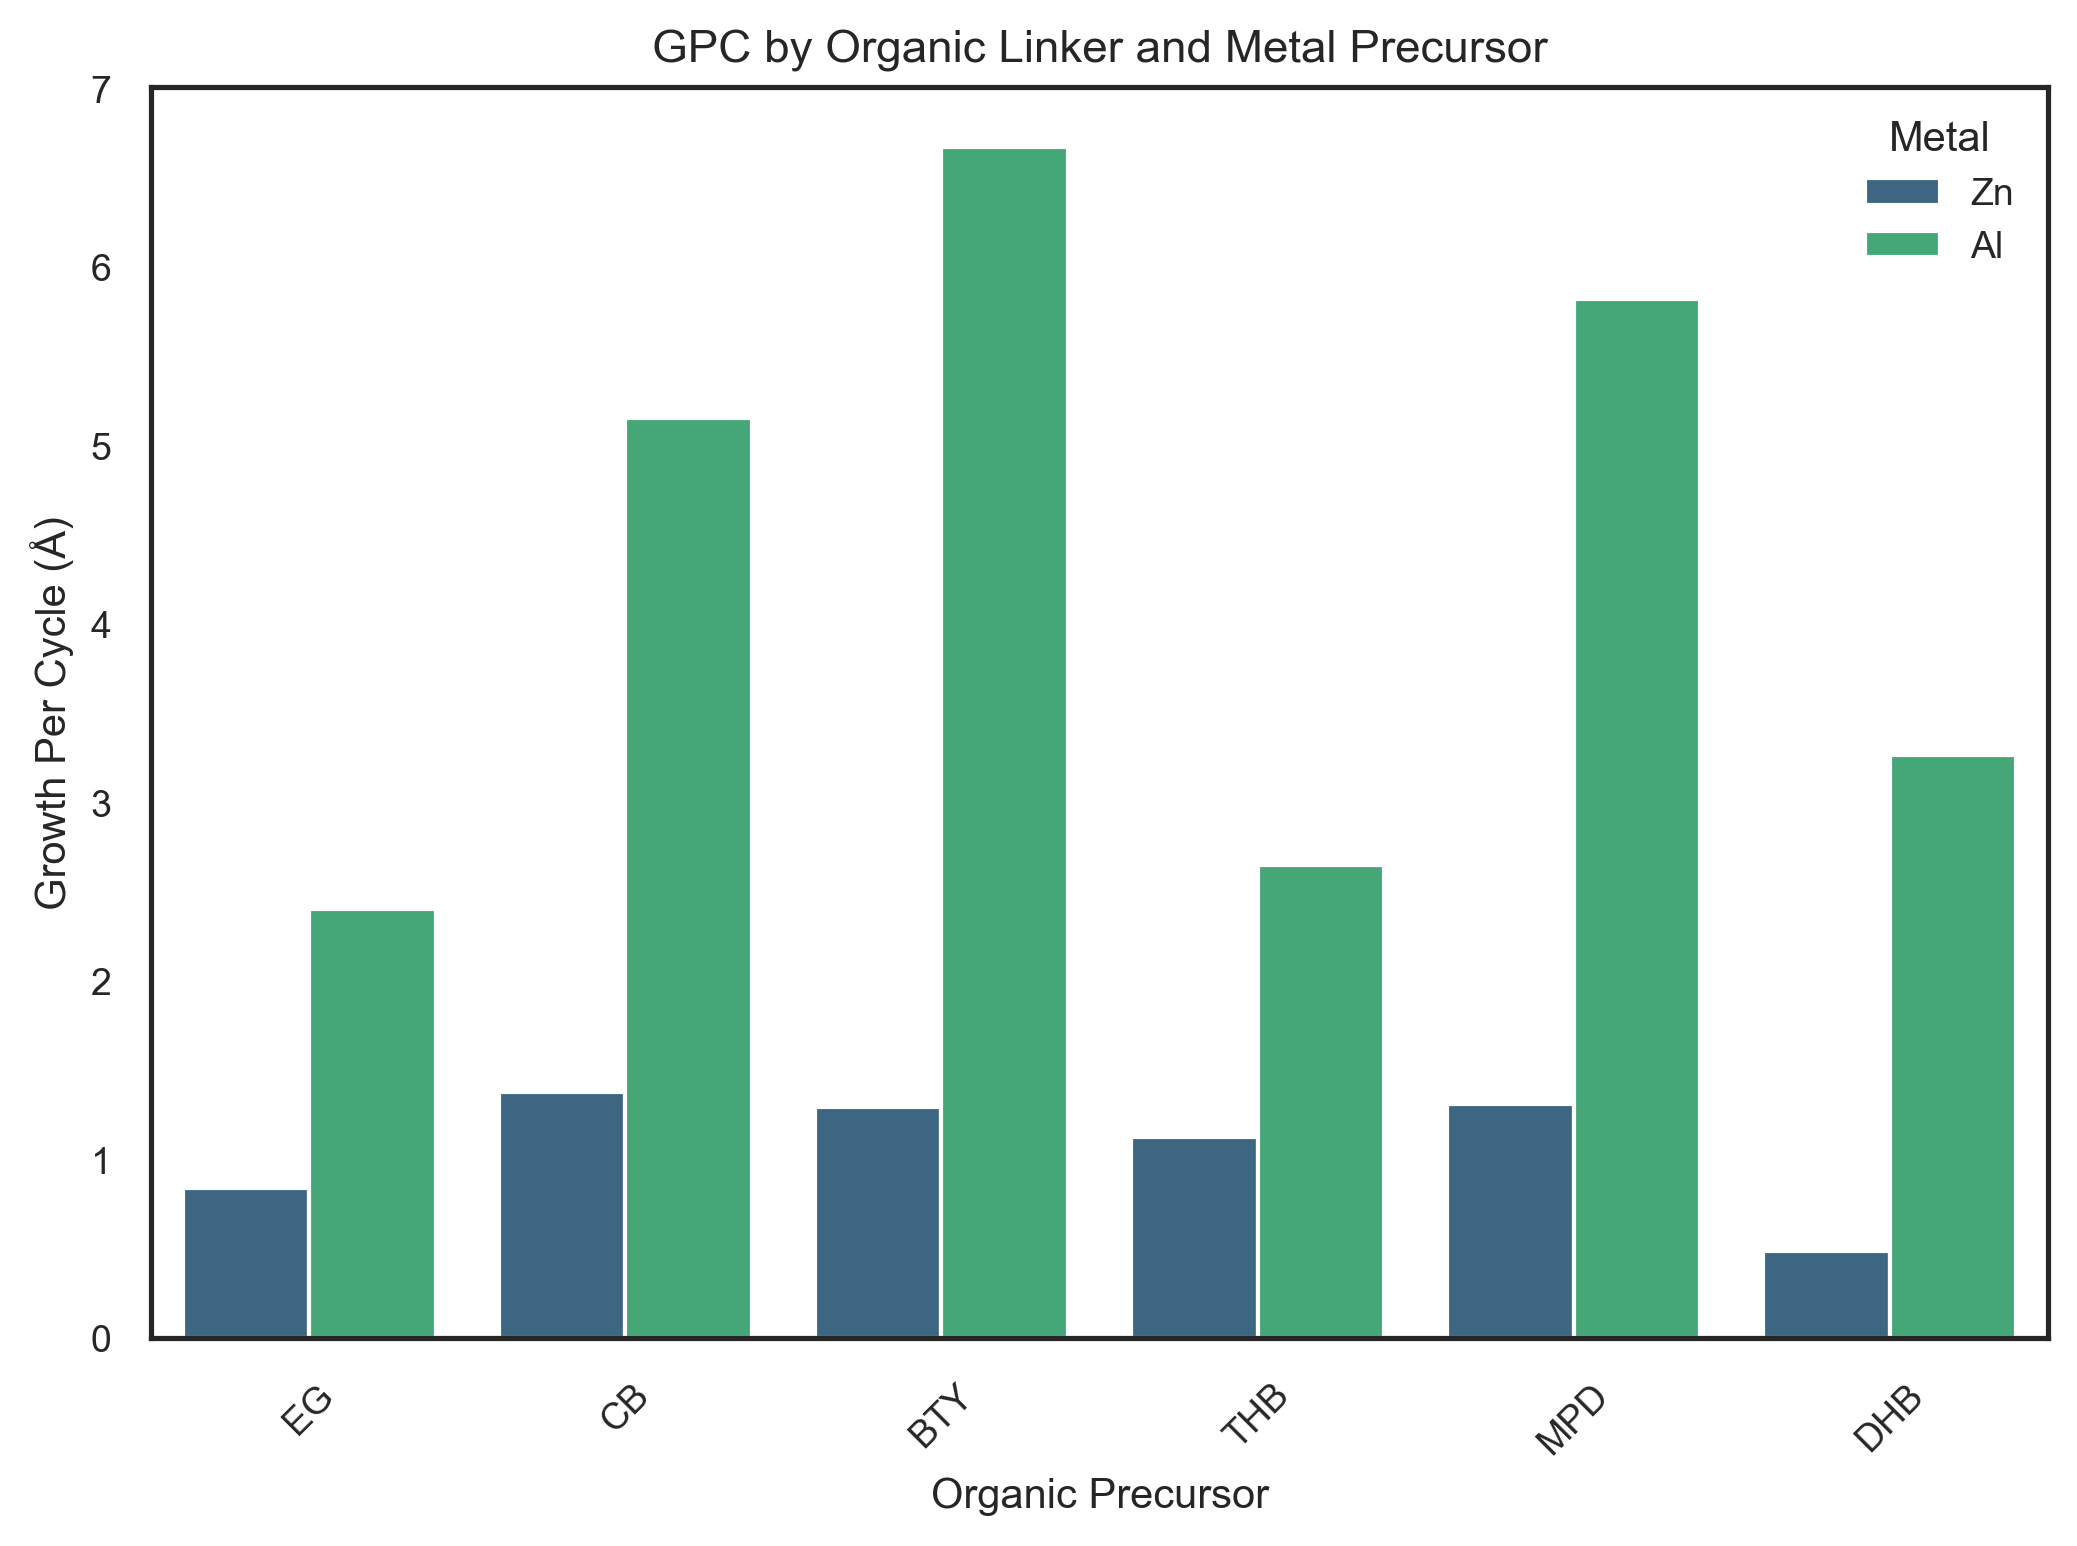

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared.utils.plot_styles import set_plot_style
from shared.utils.helpers import save_figure, get_figure_size
from shared.utils.config import fig_width_cm, organics

# Set styling
set_plot_style()

# Load and clean data
gpc_df = pd.read_csv("../data/processed/Alucone_Zincone_GPC.csv")
gpc_df['Organic'] = pd.Categorical(gpc_df['Organic'], categories=organics, ordered=True)
gpc_df['Metal'] = gpc_df['Inorganic'].map({'TMA': 'Al', 'DEZ': 'Zn'})

figsize = get_figure_size(fig_width_cm, aspect_ratio=4/3)

# --- Plot A: Thickness ---
fig1, ax1 = plt.subplots(figsize=figsize)

sns.barplot(
    data=gpc_df,
    x='Organic', y='Thickness',
    hue='Metal',
    ax=ax1,
    palette='viridis'
)

ax1.set_xlabel("Organic Precursor", fontsize=10)
ax1.set_ylabel("Thickness (nm)", fontsize=10)
ax1.set_title("Film Thickness by Organic Linker and Metal Precursor", fontsize=11)
ax1.tick_params(axis="x", rotation=45, labelsize=9)
ax1.tick_params(axis="y", labelsize=9)
ax1.legend(title="Metal", fontsize=9, title_fontsize=10)

fig1.tight_layout()
save_figure(fig1, "Fig2a_Metalcone_Thickness", formats=("png", "pdf"))

# --- Plot B: GPC ---
fig2, ax2 = plt.subplots(figsize=figsize)

sns.barplot(
    data=gpc_df,
    x='Organic', y='GPC',
    hue='Metal',
    ax=ax2,
    palette='viridis'
)

ax2.set_xlabel("Organic Precursor", fontsize=10)
ax2.set_ylabel("Growth Per Cycle (Å)", fontsize=10)
ax2.set_title("GPC by Organic Linker and Metal Precursor", fontsize=11)
ax2.tick_params(axis="x", rotation=45, labelsize=9)
ax2.tick_params(axis="y", labelsize=9)
ax2.legend(title="Metal", fontsize=9, title_fontsize=10)

fig2.tight_layout()
save_figure(fig2, "Fig2b_Metalcone_GPC", formats=("png", "pdf"))

plt.show()
